# Examples of machine learning implementations

In [1]:
from setup_notebook import set_path_to_root

set_path_to_root()

In [2]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

from learners.linear_regression import LinearRegression

### Linear Regression

Load example data from sklearn

In [3]:
def load_univariate_regression_data() -> Tuple[np.ndarray, np.ndarray]:
    reg_params = {
        "n_features": 1,
        "n_samples": 1000,
        "random_state": 42,
        "noise": 10
    }
    X, y = datasets.make_regression(**reg_params)
    return X, y

def load_multivariate_regression_data() -> Tuple[np.ndarray, np.ndarray]:
    return datasets.load_diabetes(return_X_y=True)

X_reg_uni, y_reg_uni = load_univariate_regression_data()
X_reg_multi, y_reg_multi = load_multivariate_regression_data()

#### Univariate

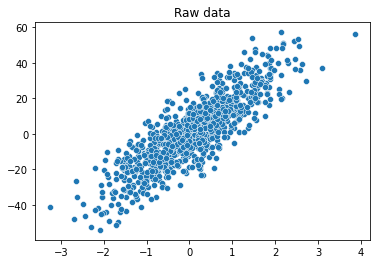

In [4]:
ax = sns.scatterplot(x=X_reg_uni.flatten(), y=y_reg_uni)
ax.set_title("Raw data")
plt.show()

Fit univariate model

In [5]:
lr_uni = LinearRegression()
lr_uni.learn(X_reg_uni, y_reg_uni)
y_hat = lr_uni.predict(X_reg_uni)

Univariate model cost 

<AxesSubplot:>

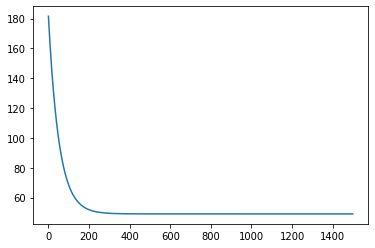

In [6]:
lr_uni_costs = lr_uni.cost_history
sns.lineplot(x=list(range(len(lr_uni_costs))), y=lr_uni_costs)

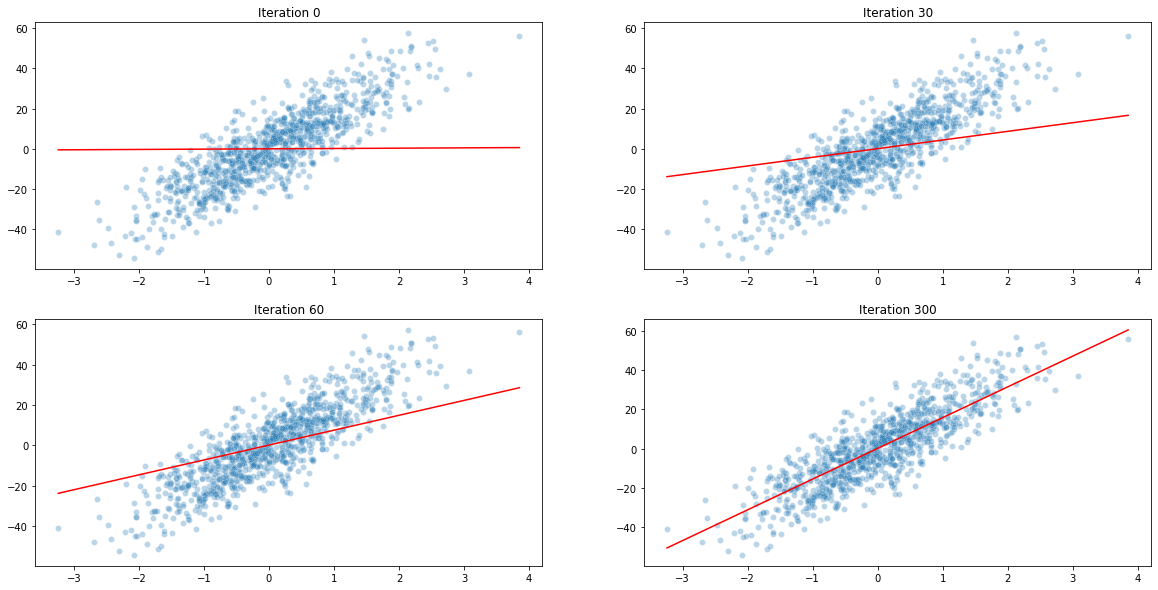

In [7]:
y_hat_history = []

for theta in lr_uni.theta_history[:1000]:
    y_hat_history.append(
        lr_uni.predict_adhoc(X_reg_uni, theta, False)
    )

lr_uni_examples = [0, 30, 60, 300]

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, ax in enumerate(axs.flatten()):
    iter_ = lr_uni_examples[i]
    sns.scatterplot(x=X_reg_uni.flatten(), y=y_reg_uni, alpha=0.3, ax=ax)
    sns.lineplot(x=X_reg_uni.flatten(), y=y_hat_history[iter_], color="red", ax=ax)
    ax.set_title(f"Iteration {iter_}")
plt.show()

Multi-variate regression example

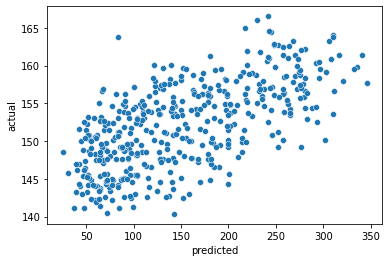

In [8]:
lr_multi = LinearRegression()
lr_multi.learn(X_reg_multi, y_reg_multi)
y_hat = lr_multi.predict(X_reg_multi)

ax = sns.scatterplot(x=y_reg_multi, y=y_hat)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
plt.show()

### Logistic regression

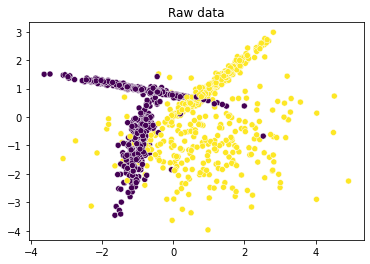

In [9]:
from learners.logistic_regression import LogisticRegression

def load_univariate_classification_data() -> Tuple[np.ndarray, np.ndarray]:
    reg_params = {
        "n_features": 2,
        "n_samples": 1000,
        "n_informative": 2,
        "n_redundant": 0,
        "n_classes": 2,
        "random_state": 44
    }
    X, y = datasets.make_classification(**reg_params)
    return X, y

X_class_uni, y_class_uni = load_univariate_classification_data()

ax = sns.scatterplot(x=X_class_uni[:, 0], y=X_class_uni[:, 1], c=y_class_uni)
ax.set_title("Raw data")
plt.show()

**Logistic regression needs a much higher alpha value for gradient descent to converge**

<AxesSubplot:>

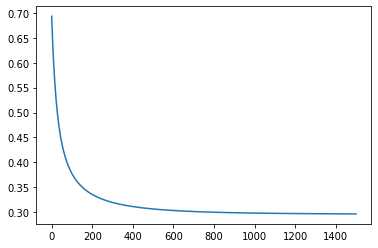

In [10]:
logreg_uni = LogisticRegression(alpha=50, n_iter=1500)
logreg_uni.learn(X_class_uni, y_class_uni)
y_hat = logreg_uni.predict(X_class_uni)
y_hat_bin = np.where(y_hat > 0.5, 1, 0)

logreg_uni_costs = logreg_uni.cost_history
sns.lineplot(x=list(range(len(logreg_uni_costs))), y=logreg_uni_costs)

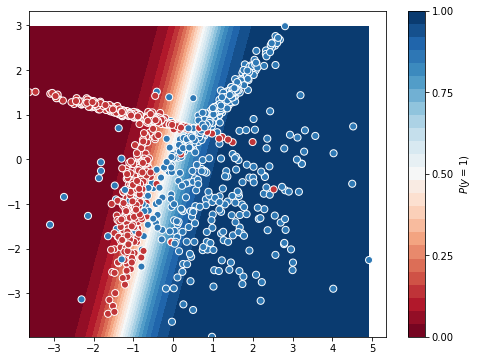

In [11]:
def plot_decision_boundary():
    """ Code from here:
        - https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
    """
    xx, yy = np.mgrid[
    X_class_uni[:, 0].min():X_class_uni[:, 0].max():.01, 
    X_class_uni[:, 1].min():X_class_uni[:, 1].max():.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = logreg_uni.predict(grid).reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X_class_uni[:, 0], X_class_uni[:, 1], c=y_class_uni, s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

plot_decision_boundary()

### K-means clustering

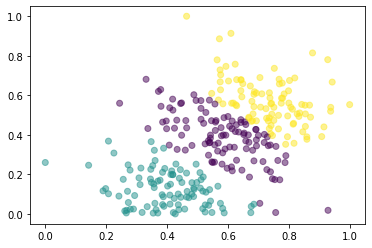

In [4]:
from learners.k_means import KMeansClustering

def load_clustering_data():
    X, _ = datasets.make_blobs(n_samples=300, random_state=999, centers=3)
    return np.abs(X)

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(load_clustering_data())

kmeans = KMeansClustering(K=3)
kmeans.learn(X)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, c=kmeans.cluster)